# VAST CHALLENGE 2018 MC 1 :

GROUPE: ANGRYBIRDS


MEMBRES: DABGHI AYMEN - BEN BACCAR YACINE - JERIDI SALMA - MEJRI AYMEN

In [12]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from scipy import misc
import os
from bokeh.palettes import d3


### Loading Data :

In [2]:
data=pd.read_csv('AllBirdsv4.csv')

In [3]:
data.head()

,File ID,English_name,Vocalization_type,Quality,Time,Date,X,Y
0,402254,Rose-crested Blue Pipit,call,no score,13:30,2/8/2018,49,63
1,406171,Rose-crested Blue Pipit,call,A,7:48,6/7/2017,125,133
2,405901,Rose-crested Blue Pipit,call,A,12:00,2/8/2018,58,76
3,405548,Rose-crested Blue Pipit,song,A,11:00,3/10/2018,55,125
4,401782,Rose-crested Blue Pipit,song,A,6:00,6/29/2008,129,123


### Data Preprocessing :

**Remarque:** <br>
Nous constatons que la variable Y est de type chaine de caractère. Il est donc nécessaire de la transformer en une variable réelle. le problème est que certaines valeurs comportent des erreurs comme "54?" ou "68?" .

In [8]:
data['Y']=data['Y'].str.replace('?', '')
data['Y']=pd.to_numeric(data['Y'], errors='ignore')
bird_names = pd.unique(data.English_name)

#### Question 1 : Using Python 3.6 and the Jupyter notebook, show the map in a nice way.

C:\Users\mejri aymen\Anaconda33\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


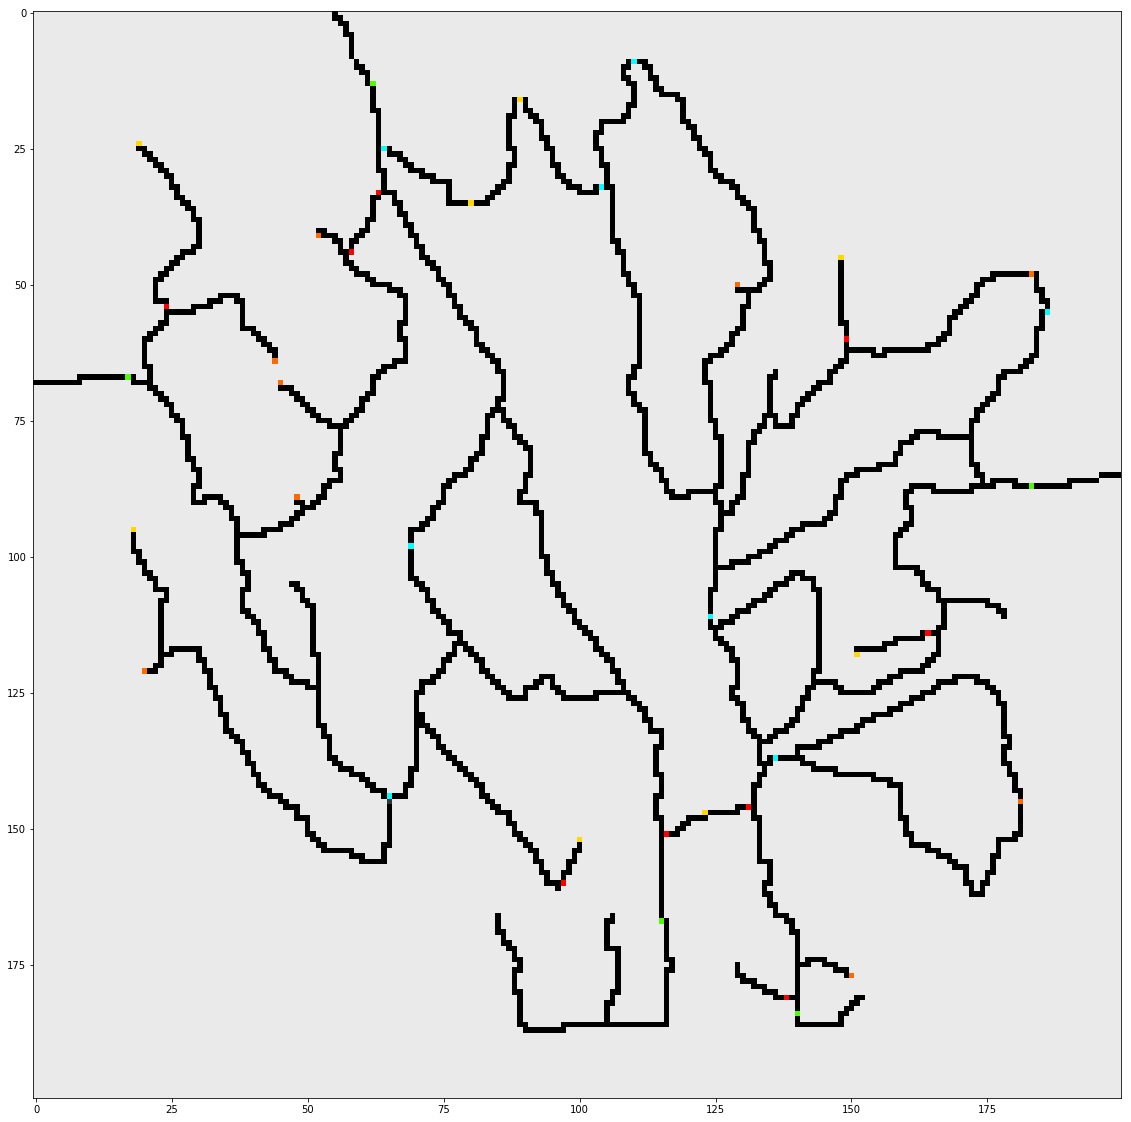

In [9]:
plt.figure(figsize = (20,20))
image= misc.imread(os.path.join('','Lekagul Roadways 2018.bmp'), flatten= 0)
plt.imshow(image);

#### Question 2 : Show all the birds positions from AllBirdsv4.csv over the map

Dans cette partie nous avons affiché tous les oiseaux sans tenir compte de la nature de leurs espèces.

C:\Users\mejri aymen\Anaconda33\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


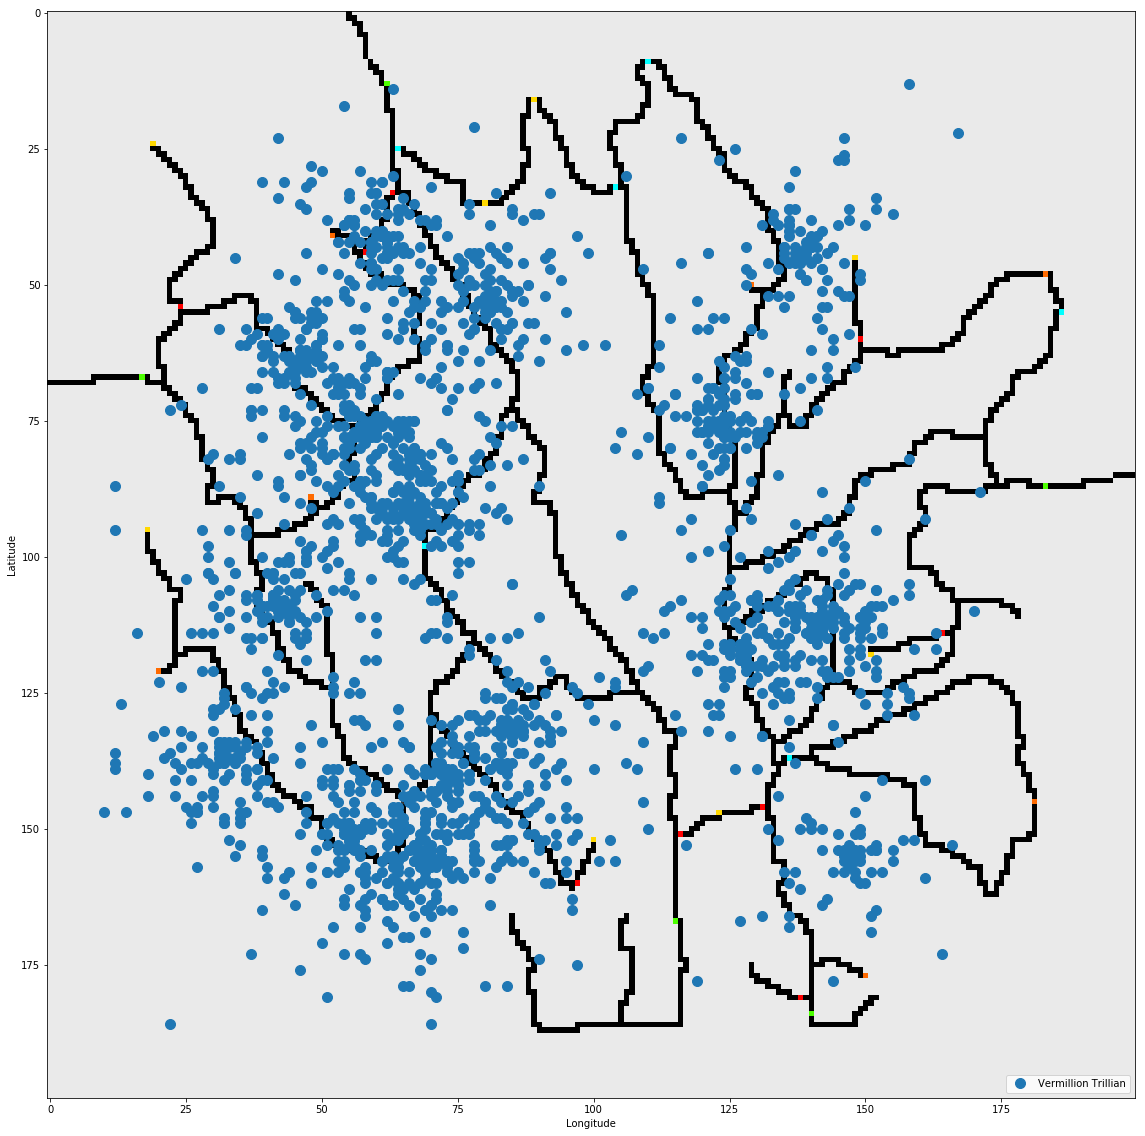

In [23]:
plt.figure(figsize = (20,20))
image= misc.imread(os.path.join('','Lekagul Roadways 2018.bmp'), flatten= 0)
plt.imshow(image);
colors= d3['Category20'][int(data['English_name'].unique().shape[0])]

# for bird_name in bird_names:  
x,y = data.X,data.Y
x,y=x.get_values(),y.get_values()
plt.plot(x,y,'o',markersize=10, label=bird_name)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(loc="lower right")
plt.show()

#### Question 3 : Improve the map to be more readable

Dans cette partie nous visualisons les différents oiseaux selon leurs espèces. la représentation des oiseaux est faite à l'aide de points dont la couleur détermine la nature de l'espèce.

C:\Users\mejri aymen\Anaconda33\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


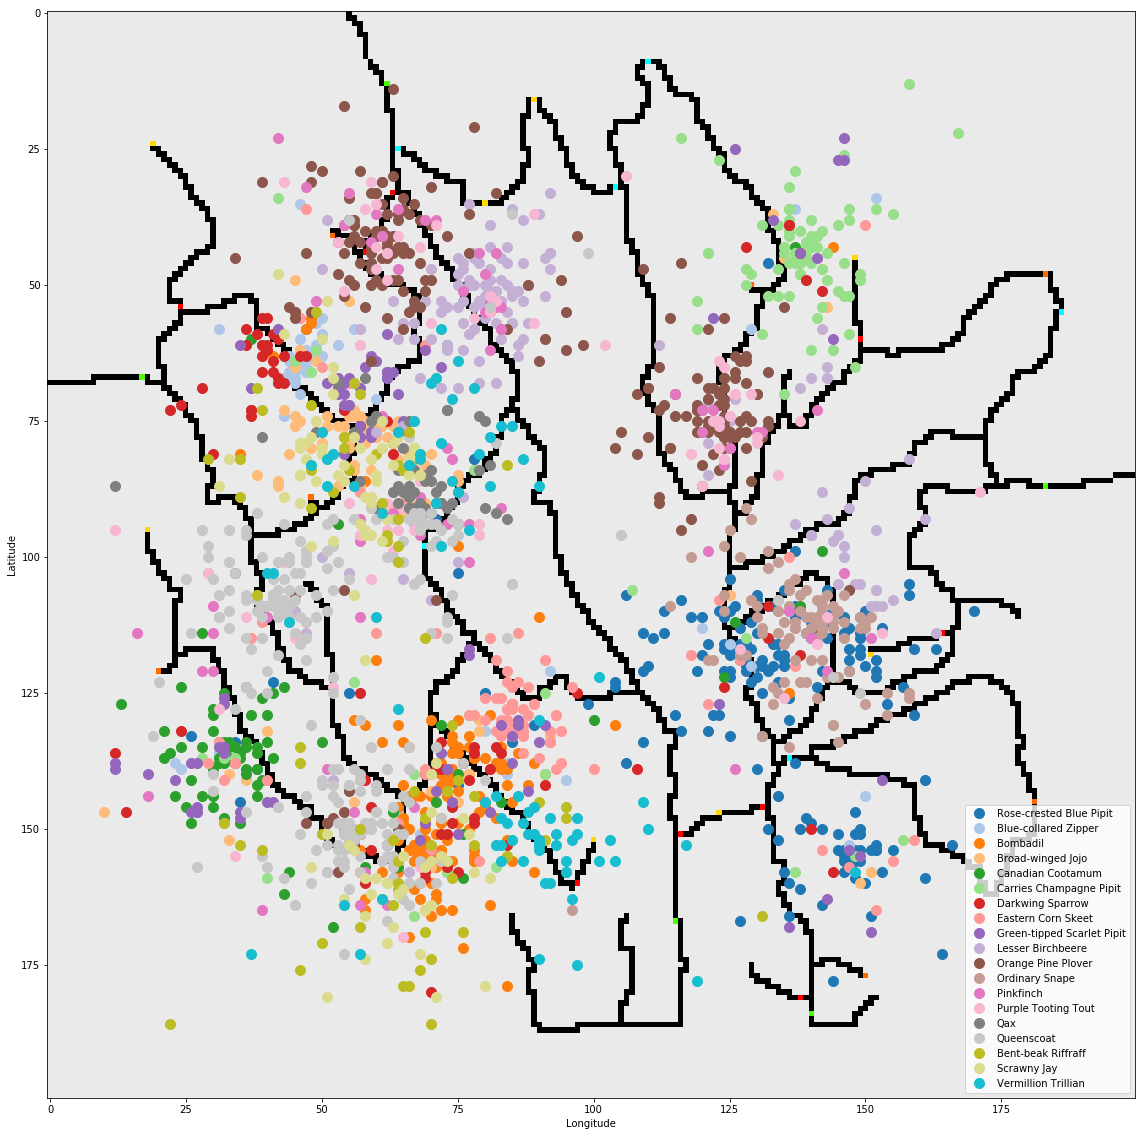

In [24]:
plt.figure(figsize = (20,20))
image= misc.imread(os.path.join('','Lekagul Roadways 2018.bmp'), flatten= 0)
plt.imshow(image);
colors= d3['Category20'][int(data['English_name'].unique().shape[0])]

k=0
for bird_name in bird_names:
    ix = data.English_name == bird_name  #storing the indices of the bird Eric
    x,y = data.X[ix],data.Y[ix]
    x,y=x.get_values(),y.get_values()
    plt.plot(x,y,'o',color=colors[k],markersize=10, label=bird_name)
    k=k+1

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(loc="lower right")
plt.show()

### Question 4 : Show the 15 positions of the birds from Kasios : 

Pour la prédiction de la nature de l'espèce de ces 15 oiseaux, nous avons opté pour l'utilisation du model RandomForest.

In [26]:
data_test=pd.read_csv('Test Birds Location.csv')

In [27]:
X_train=data[['X','Y']]
X_test=data_test[[' X',' Y']]
y_train=data['English_name']

In [28]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
# clf=CatBoostClassifier()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
X_test['prediction']=y_pred

C:\Users\mejri aymen\Anaconda33\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [29]:
bird_names_test = pd.unique(X_test.prediction)

C:\Users\mejri aymen\Anaconda33\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


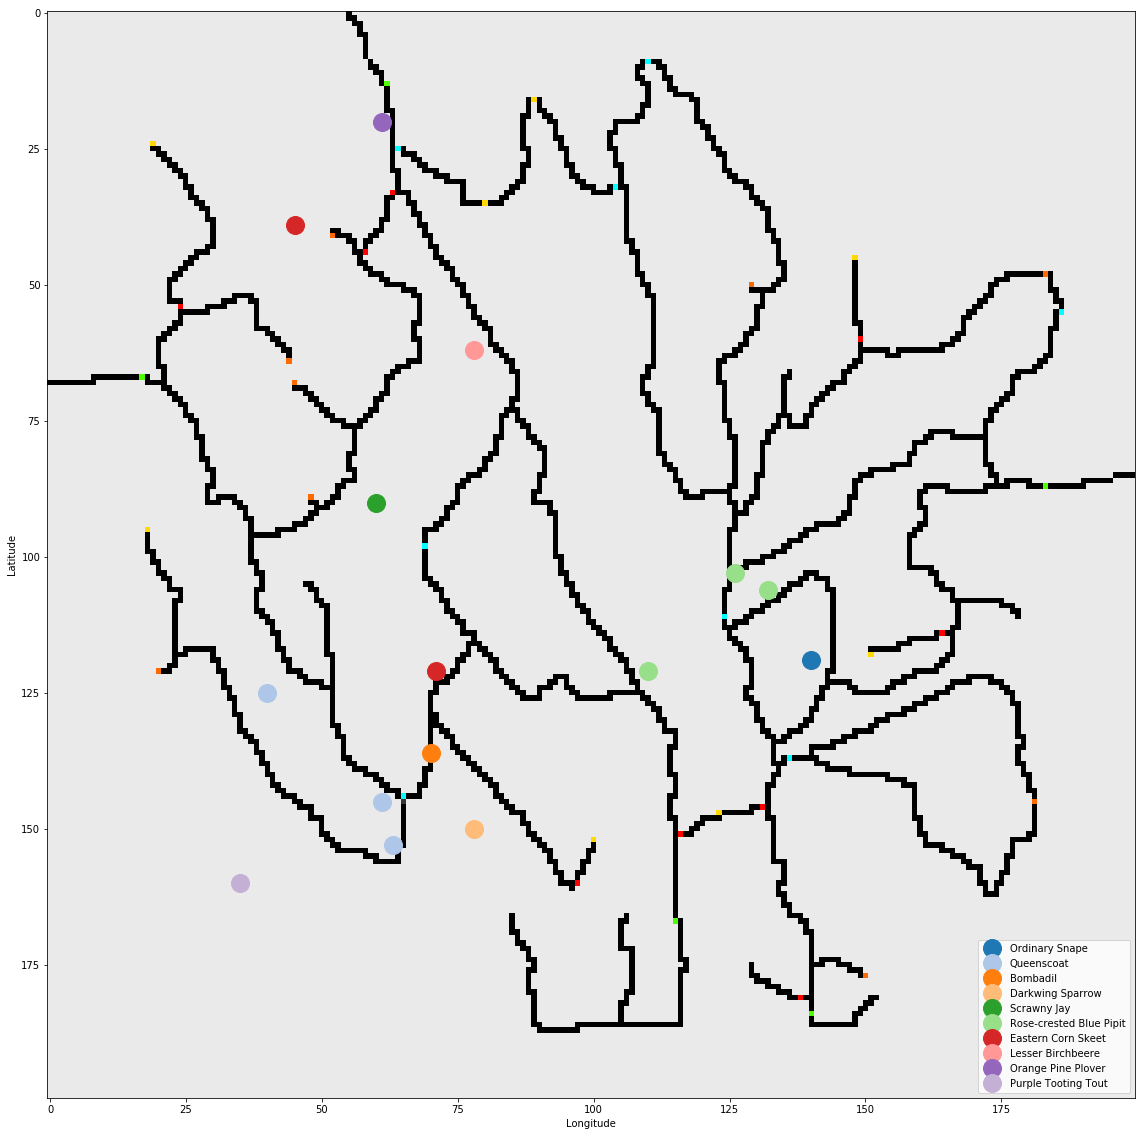

In [32]:
plt.figure(figsize = (20,20))
image= misc.imread(os.path.join('','Lekagul Roadways 2018.bmp'), flatten= 0)
plt.imshow(image);

colors= d3['Category20'][int(bird_names_test.shape[0])]
k=0
for bird_name in bird_names_test:
    ix = X_test.prediction == bird_name  #storing the indices of the bird Eric
    x,y = X_test[' X'][ix],X_test[' Y'][ix]
    x,y=x.get_values(),y.get_values()
    plt.plot(x,y,'o',color=colors[k], markersize=18, label=bird_name)
    k=k+1

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(loc="lower right")
plt.show()